In [1]:
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pooch
import requests
from tqdm import tqdm

In [2]:
pooch.get_logger().setLevel("WARNING")

In [3]:
output = Path("..") / "data" / "raw"

In [4]:
catalogue_url = "https://www.ngdc.noaa.gov/geomag/aeromag-project.txt"
catalogue_hash = "sha256:162e30f2d2542e96bd215b8b51f1585a3282e5fc6c225507588812f524b0d2a2"
catalogue_file = pooch.retrieve(
    catalogue_url, known_hash=catalogue_hash, path=output, fname="aeromag_catalogue.json"
)
with open(catalogue_file) as file:
    catalogue = json.load(file)["data"]

In [5]:
len(catalogue)

139

In [6]:
catalogue[0]

{'SURVEY_ID': 'NRL_LINCOLN-SEA75',
 'FORMAT_88': 'MAG88T',
 'PARAMS_CO': 'TR',
 'DATE_CREAT': 20140627,
 'INST_SRC': 'US Naval Research Laboratory',
 'COUNTRY': 'United States',
 'PLATFORM': 'RP-3-A Navy Buno 149670',
 'PLAT_TYP': 'Airplane',
 'CHIEF': 'R.H. Feden',
 'PROJECT': 'Lincoln Sea',
 'DATE_DEP': 19750417,
 'PORT_DEP': 'Thule, Greenland',
 'DATE_ARR': 19750503,
 'PORT_ARR': 'Thule, Greenland',
 'POS_INFO': 'Litton 51 INS',
 'LAT_TOP': 87.66,
 'LAT_BOTTOM': 73.37,
 'LON_LEFT': -146.81,
 'LON_RIGHT': -9.99,
 'TRK_SPACE': 'NE - SW: 9.0 to 17.0 Kilometers',
 'NOM_ALT': '300 meters ASL',
 'NOM_SPEED': '138.4 knots ave calculated',
 'TOTAL_OBS': 129421,
 'TOTAL_DIST': 18850,
 'INSTRUMENT': 'Geometrics G-801/3 Proton Precession',
 'SAMP_RATE': '2.5 seconds',
 'TOW_DIST': '',
 'SENSITIV': '',
 'REF_FIELD': 'DGRF',
 'ADD_DOC': 'A write up about the survey can be found in the "Journal of Geophysical Research", vol 84, no. B3, p. 1071 - 1089, 1979',
 'DATE_ADDED': '27-Jun-14',
 'PROJECT_

In [7]:
assert all("Project_Data" in entry for entry in catalogue) and all("SURVEY_ID" in entry for entry in catalogue)

In [8]:
%%time
nbytes = []
failed = []
for i, entry in enumerate(tqdm(catalogue, ncols=100)):
    response = requests.get(entry["Survey_Data"], stream=True)
    # Keep track of any failed requests
    if response.status_code != 200:
        failed.append((i, entry["SURVEY_ID"]))
    nbytes.append(int(response.headers["Content-length"]))
nbytes = np.array(nbytes)

100%|█████████████████████████████████████████████████████████████| 139/139 [02:04<00:00,  1.12it/s]


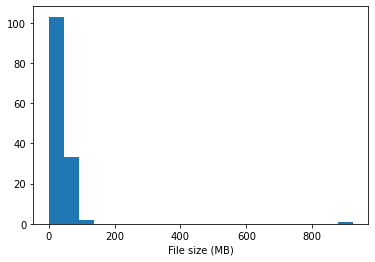

In [9]:
plt.figure()
plt.hist(nbytes * 1e-6, bins=20)
plt.xlabel("File size (MB)")
plt.show()

In [10]:
print(f"Total download size: {nbytes.sum() * 1e-6} MB")

Total download size: 4173.499881 MB


In [8]:
failed = []
for i, entry in enumerate(tqdm(catalogue, ncols=100)):
    try:
        pooch.retrieve(entry["Survey_Data"], known_hash=None, path=output)
    except:
        failed.append(i)

100%|█████████████████████████████████████████████████████████████| 139/139 [00:06<00:00, 21.85it/s]
